# Word2Vec Model Visualização pelas Épocas

Esse notebook segue a visualização dos modelos de embedding Word2Vec pelas múltiplas épocas. Usei PCA e TSNE para a redução de dimensionalidade e para visualizar os resultados.

#### Carregando bibliotecas:

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Definindo caminho e modelos

In [25]:
model_dir = '/home/jupyter-jphuser04/projects/word2vec/embedding/models/'
vocab_df = pd.read_csv("vocabulary.csv")

# Função para carregar os embeddings
def load_embeddings(epoch, path_template):
    model_path = path_template.format(epoch=epoch)
    model = torch.load(model_path)
    return model['embeddings.weight'].cpu().numpy() if 'embeddings.weight' in model else None

In [28]:
# Criar o dicionário word_to_idx assumindo que a ordem é o índice
word_to_idx = {word: idx for idx, word in enumerate(vocab_df['Word'])}

In [10]:
# Redução de dimensionalidade para 2 dimensões
def reduce_embeddings(embeddings, method='PCA', n_components=2):
    if method == 'PCA':
        reducer = PCA(n_components=n_components)
    elif method == 'TSNE':
        reducer = TSNE(n_components=n_components, random_state=42)
    return reducer.fit_transform(embeddings)

In [22]:
def get_embedding(word, model, word_to_idx):
    idx = word_to_idx.get(word)
    if idx is not None:
        return model['embeddings.weight'][idx].cpu().numpy()
    else:
        print(f"Word '{word}' not found in vocabulary.")
        return np.zeros(model['embeddings.weight'].shape[1])  # Retorna vetor zero se não encontrar


### Plotando os Embeddings reduzidos

/tmp/ipykernel_314075/2974443597.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


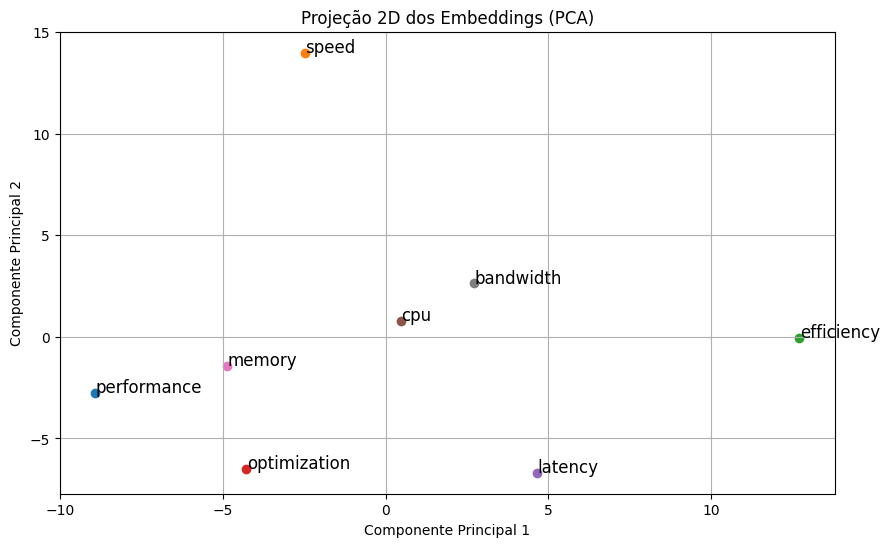

In [42]:
word_list = ['performance', 'speed', 'efficiency', 'optimization', 'latency', 'cpu', 'memory', 'bandwidth']

# Carregar o modelo e vocabulário
model_path = model_dir + 'word2vec_light_model_epoch_15.pth'
model = torch.load(model_path)

# Obter os embeddings das palavras na word_list
embeddings = np.array([get_embedding(word, model, word_to_idx).flatten() for word in word_list])

# Reduzir para 2D com PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
for i, word in enumerate(word_list):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1] + 0.02, word, fontsize=12)

plt.title('Projeção 2D dos Embeddings (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

/tmp/ipykernel_314075/2416644389.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)
/home/jupyter-jphuser04/projects/word2vec/venv/lib/python

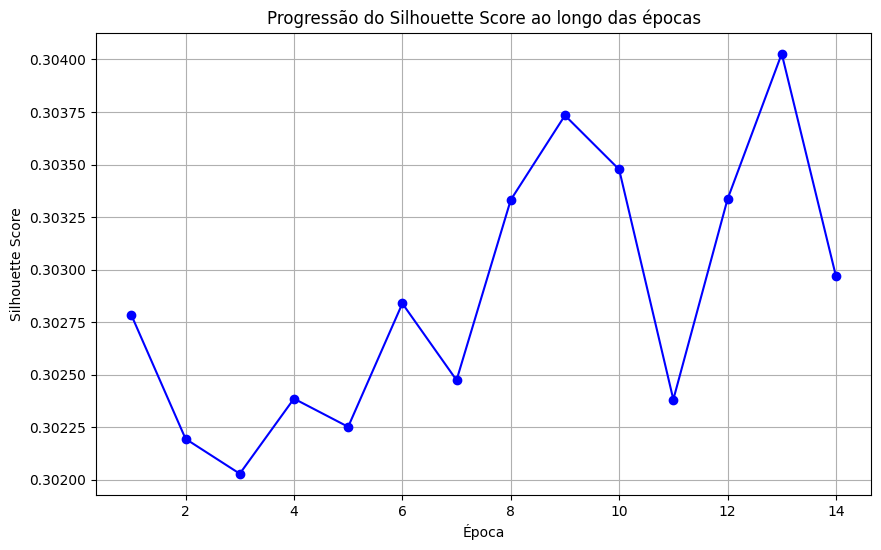

In [37]:
epochs = range(1, 15)
silhouette_scores = []

for epoch in epochs:
    # Carregar as embeddings para a época atual
    model_path = model_dir + f'word2vec_light_model_epoch_{epoch}.pth'
    model = torch.load(model_path)
    embeddings = model['embeddings.weight'].cpu().numpy()  # Obter todas as embeddings

    # Reduzir para 2D (opcional: depende do tamanho das embeddings)
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Aplicar KMeans para gerar clusters
    kmeans = KMeans(n_clusters=5, random_state=42)  # Ajuste o número de clusters conforme necessário
    labels = kmeans.fit_predict(reduced_embeddings)

    # Calcular o Silhouette Score
    score = silhouette_score(reduced_embeddings, labels)
    silhouette_scores.append(score)

# Plotar a progressão do Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(epochs, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Progressão do Silhouette Score ao longo das épocas')
plt.xlabel('Época')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [4]:
# Carregar o modelo de embedding
embedding_model = torch.load('/home/jupyter-jphuser04/projects/word2vec/embedding/models/word2vec_light2_model_epoch_18.pth')

# Extrair a matriz de embeddings usando a chave correta
embedding_matrix = embedding_model['embeddings.weight']

# Obter a quantidade de vetores (palavras) e a dimensão dos embeddings
num_embeddings = embedding_matrix.size(0)
dim_embeddings = embedding_matrix.size(1)

print(f"Quantidade de vetores (palavras): {num_embeddings}")
print(f"Dimensão de cada vetor: {dim_embeddings}")

/tmp/ipykernel_316367/3739631683.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embedding_model = torch.load('/home/jupyter-jphuser04/projects/word2vec/embedding/models

Quantidade de vetores (palavras): 114035
Dimensão de cada vetor: 512
